## Quantum Illumination Experiment 3

__Error probabilities with respect to average photon numbers.__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

--- 3799.040326356888 seconds ---

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configuration
# from IPython.display import set_matplotlib_formats                                                   
# set_matplotlib_formats('pdf', 'png')
# np.set_printoptions(threshold='nan', precision=6, suppress=True)
plt.style.use(['seaborn-whitegrid', '14pt'])
%matplotlib inline

In [97]:
filename1 = 'expr_3_nmax_32_nth_0.1_ns_0.01_04-19.csv'
df = pd.read_csv('../output/data/expr_3/' + filename1, comment='#')

# filename2 = 'expr_3_qi_nmax_32_nth_1.0_g_101_04-17_opt_etgl_L-BFGS-B.csv'
# df2 = pd.read_csv('../output/data/expr_3/' + filename2, comment='#')

In [98]:
df.shape

(6, 15)

In [99]:
df

,nmax,Nth,R,State,sqz,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,32,0.1,0.01,TMSS,0.099834,0.099504,0.020000,0.056102,0.495279,0.499957,0.500000,0.010000,0.010000,NaN,NaN
1,32,0.1,0.01,PS,0.099834,0.099504,0.079608,0.168732,0.490605,0.499839,0.500000,0.039804,0.039804,NaN,NaN
2,32,0.1,0.01,PA,0.099834,0.099504,2.079608,0.168732,0.485689,0.499632,0.500000,1.039804,1.039804,NaN,NaN
3,32,0.1,0.01,PSA,0.099834,0.099504,0.300129,0.439049,0.481975,0.499450,0.500000,0.150064,0.150064,NaN,NaN
4,32,0.1,0.01,PAS,0.099834,0.099504,2.300129,0.439049,0.474332,0.498892,0.499989,1.150064,1.150064,NaN,NaN
5,32,0.1,0.01,PCS,0.099834,0.099504,2.006894,0.687711,0.459463,0.497008,0.498883,0.462058,1.544835,0.11697,0.948384


In [100]:
def upper_bound(QCB, M):
    """ Upper bound (Quantum Chernoff bound) of the error probability
        using s = 1/2
    """
    return 0.5 * QCB ** M


def lower_bound(tr, M):
    """ Lower bound of the error probability
    """
    return (1 - np.sqrt(1 - tr ** (2 * M))) / 2

In [101]:
df['Trace'] = df['Chernoff_Bound'].apply(lambda x: 2 * x)

In [102]:
df

,nmax,Nth,R,State,sqz,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb,Trace
0,32,0.1,0.01,TMSS,0.099834,0.099504,0.020000,0.056102,0.495279,0.499957,0.500000,0.010000,0.010000,NaN,NaN,0.999914
1,32,0.1,0.01,PS,0.099834,0.099504,0.079608,0.168732,0.490605,0.499839,0.500000,0.039804,0.039804,NaN,NaN,0.999677
2,32,0.1,0.01,PA,0.099834,0.099504,2.079608,0.168732,0.485689,0.499632,0.500000,1.039804,1.039804,NaN,NaN,0.999263
3,32,0.1,0.01,PSA,0.099834,0.099504,0.300129,0.439049,0.481975,0.499450,0.500000,0.150064,0.150064,NaN,NaN,0.998901
4,32,0.1,0.01,PAS,0.099834,0.099504,2.300129,0.439049,0.474332,0.498892,0.499989,1.150064,1.150064,NaN,NaN,0.997783
5,32,0.1,0.01,PCS,0.099834,0.099504,2.006894,0.687711,0.459463,0.497008,0.498883,0.462058,1.544835,0.11697,0.948384,0.994016


In [112]:
traces = df['Trace'].values
for e in traces:
    print(e)

0.999914200051
0.999677113293
0.999263243254
0.998900522177
0.99778322983
0.994016471141


TMSS 0.999914200049
PS 0.999677113284
PSA 0.998900522122
PCS 0.993858364839

## Plot

In [120]:
dashes = {'PA':[6,2], 'PAS':[6,2,1,2], 'PS':[3,2], 'PSA':[3,2,1,2], 'PCS':[1,1]}
# names = ('TMSS', 'PS', 'PSA', 'PCS')
names = ('PA', 'PAS', 'PCS')
traces = {'TMSS':0.999914200051, 'PS':0.999677113293, 'PSA':0.998900522177, 
          'PCS':0.994016471141, 'PA':0.999263243254, 'PAS': 0.99778322983}

In [121]:
res = dict()
res['M'] = np.logspace(2, 5, 51)
for name in names:
    trace = traces[name]
    res[name + 'upper'] = [upper_bound(trace, m) for m in res['M']]
    res[name + 'lower'] = [lower_bound(trace, m) for m in res['M']]

In [122]:
len(res['M'])

51

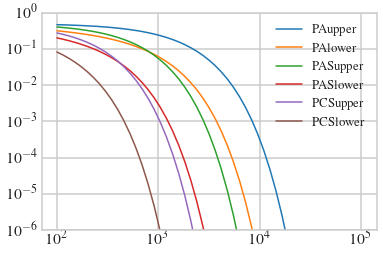

In [123]:
for key, item in res.items():
    if key != 'M':
        plt.plot(res['M'], item, label=key)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-6, 1)
plt.legend(loc=0)

## Error vs Lambda

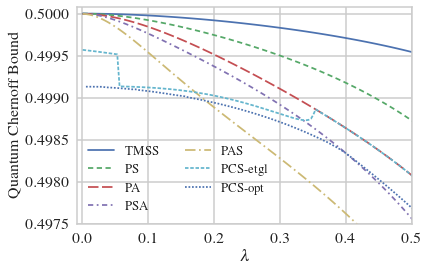

In [43]:
for name in names:
    temp_df = df[df['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.008, 0.5)
plt.ylim(0.4975, 0.50008)
plt.legend(loc=3, fontsize=13, ncol=2)
plt.xlabel("$\lambda$")
plt.ylabel("Quantum Chernoff Bound")
plt.savefig('../output/figures/g_qcb_vs_lmd_opt_qcb.pdf', bbox_inches='tight')

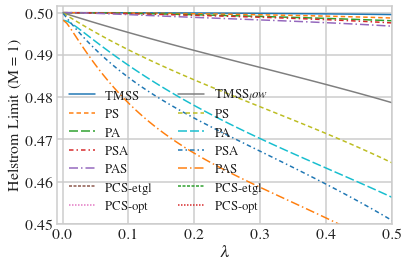

In [18]:
for name in names:
    temp_df = df[df['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)

for name in names:
    temp_df = df[df['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Lower_Bound'], label=name+'_low')
    else:
        plt.plot(temp_df['lambda'], temp_df['Lower_Bound'], 
                 dashes=dashes[name], label=name)
        
plt.xlim(-0.008, 0.5)
plt.ylim(0.45, 0.5015)
plt.legend(loc=0, fontsize=13, ncol=2)
plt.xlabel("$\lambda$")
plt.ylabel("Helstrom Limit (M = 1)")
# plt.savefig('../output/figures/g_qlb_vs_lmd_opt_qcb.pdf', bbox_inches='tight')

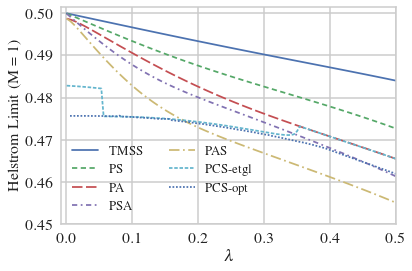

In [44]:
for name in names:
    temp_df = df[df['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Helstrom_Bound'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['Helstrom_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.008, 0.5)
plt.ylim(0.45, 0.5015)
plt.legend(loc=0, fontsize=13, ncol=2)
plt.xlabel("$\lambda$")
plt.ylabel("Helstrom Limit (M = 1)")
plt.savefig('../output/figures/g_qhb_vs_lmd_opt_qcb.pdf', bbox_inches='tight')

## Error vs Average Photon Number

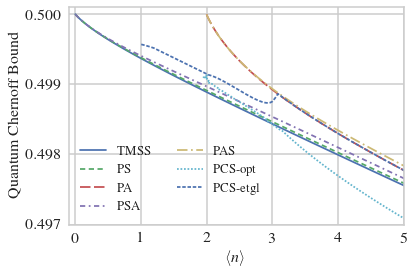

In [37]:
for name in names:
    temp_df = df[df['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.1, 5)
plt.ylim(0.497, 0.5001)
plt.legend(loc=3, fontsize=13, ncol=2)
plt.xlabel("$\langle n \\rangle$")
plt.ylabel("Quantum Chernoff Bound")
# plt.savefig('../output/figures/g_qcb_vs_nbar_opt_qcb.pdf', bbox_inches='tight')

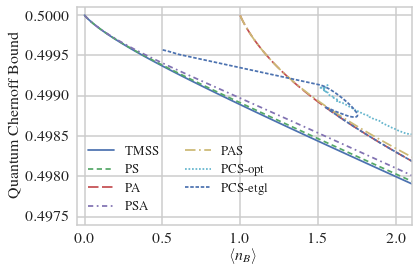

In [36]:
for name in names:
    temp_df = df[df['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['B_aver_N'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['B_aver_N'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.05, 2.1)
plt.ylim(0.4974, 0.5001)
plt.legend(loc=3, fontsize=13, ncol=2)
plt.xlabel("$\langle n_B \\rangle$")
plt.ylabel("Quantum Chernoff Bound")
# plt.savefig('../output/figures/g_qcb_vs_nbarB_opt_qcb.pdf', bbox_inches='tight')